2025-04-07 20:03:07.524640: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3498 - loss: 1.7639 - val_accuracy: 0.5233 - val_loss: 1.3097
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5622 - loss: 1.2279 - val_accuracy: 0.6149 - val_loss: 1.0924
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6297 - loss: 1.0493 - val_accuracy: 0.6328 - val_loss: 1.0391
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6653 - loss: 0.9422 - val_accuracy: 0.6589 - val_loss: 0.9753
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6917 - loss: 0.8767 - val_accuracy: 0.6630 - val_loss: 0.9665
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7169 - loss: 0.8046 - val_accuracy: 0.6812 - val_loss: 0.9219
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7334 - loss: 0.7525 - val_accuracy: 0.7028 - val_loss: 0.8778
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7510 - loss: 0.7028 - 

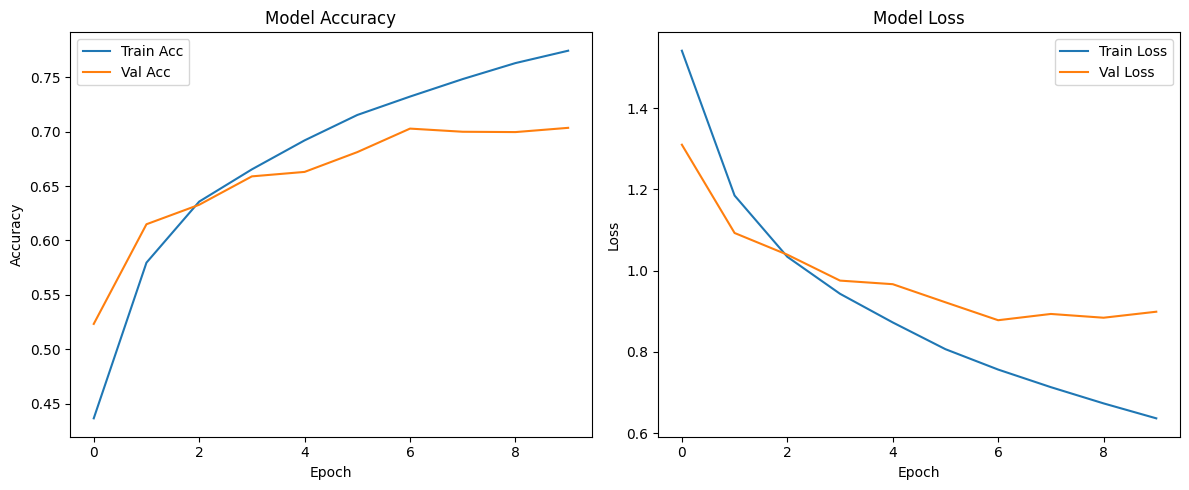

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


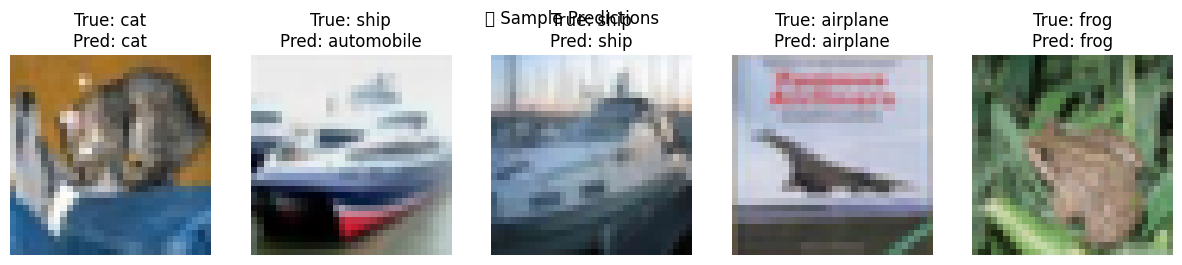

In [3]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Class labels for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")

# Plot Accuracy & Loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Show sample predictions
num_samples = 5
plt.figure(figsize=(15,3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_test[i][0]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.suptitle("🎯 Sample Predictions")
plt.show()
